<a href="https://colab.research.google.com/github/ZaeemAkbarKhan786/MS_ProgrammingForAI/blob/main/bert_fine_tuning_mr_google_colab_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------

# **Name:** Zaeem Akbar Khan
# **Registration #:** FA24-RAI-019
# **Course:** Programming for AI
# **Assignment #:** 03

-------------------------------------------------------------

**Base Paper Name:** Bert-Enhanced Text Graph Neural Network for Classification

# **Selected Paper**
✔ Recent Research (2020–2024)

✔ Reputable Journal (W Category)

✔ BERT-Based Model for Text Classification

✔ Clear Description of Dataset, Problem, and Methodology


*   The problem statement (text classification).
*   Datasets (MR, SST-2, R8, Ohsumed).
*   Methodology, including graph construction, BERT-based feature extraction, and feature aggregation.

✔ Code Availability

## **Selected Dataset:**
**MR**

**Link:** https://www.kaggle.com/datasets/weipengfei/ohr8r52

# **Selected Paper links:**
**PubMed:** https://pubmed.ncbi.nlm.nih.gov/34828233/

**ResearchGate:** https://www.researchgate.net/publication/356388348_Bert-Enhanced_Text_Graph_Neural_Network_for_Classification

**Semantic Scholar:** https://www.semanticscholar.org/paper/Bert-Enhanced-Text-Graph-Neural-Network-for-Yang-Cui/108eea36fc140fc0aeb2b6024925b28a7125c2ca

# **Base Paper Code:**
**Link:** https://github.com/pingpingand/BEGNN

**Installing Dependencies**

In [1]:
!pip install -U "tensorflow-text==2.13.*"

**Importing Required Libraries**

In [2]:
!pip install --quiet tensorflow_text
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Loading the Dataset**

In [3]:
tempdf = pd.read_csv('/content/MR.csv')

**Checking Dataset Shape**

In [4]:
tempdf.shape

(1000, 3)

**Viewing the Dataset Head**

In [5]:
tempdf.head()

,Unnamed: 0,review,sentiment
0,0,i'm convinced i could keep a family of five b...,negative
1,1,davis is so enamored of her own creation that...,negative
2,2,it 's hard to imagine that even very small ch...,negative
3,3,"somewhere in the middle , the film compels , ...",negative
4,4,"a muckraking job , the cinematic equivalent o...",positive


**Dropping Unnecessary Columns**

In [6]:
tempdf.drop("Unnamed: 0", axis = 1, inplace= True)

**Selecting a Subset of Data**

In [7]:
df = tempdf.iloc[:100]

**Viewing the Subset Data Head**

In [8]:
df.head()

,review,sentiment
0,i'm convinced i could keep a family of five b...,negative
1,davis is so enamored of her own creation that...,negative
2,it 's hard to imagine that even very small ch...,negative
3,"somewhere in the middle , the film compels , ...",negative
4,"a muckraking job , the cinematic equivalent o...",positive


**Text PreProcessing Functions**

In [9]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

**Applying Preprocessing Steps**

In [10]:
df['review'] = df['review'].str.lower()

df['review'] = df['review'].apply(remove_html_tags)

df['review'] = df['review'].apply(remove_url)

df['review'] = df['review'].apply(remove_punc)

<ipython-input-10-a44e574bae2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()
<ipython-input-10-a44e574bae2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_html_tags)
<ipython-input-10-a44e574bae2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

**Viewing Preprocessed Data**

In [11]:
df.head()

,review,sentiment
0,im convinced i could keep a family of five bl...,negative
1,davis is so enamored of her own creation that...,negative
2,it s hard to imagine that even very small chi...,negative
3,somewhere in the middle the film compels as...,negative
4,a muckraking job the cinematic equivalent of...,positive


**Verifying Dataset Shape**

In [12]:
df.shape

(100, 2)

**Importing TensorFlow and TensorFlow Hub**

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.backend.clear_session()

**Splitting Data into Features and Labels**

In [14]:
X = df['review']
Y = df['sentiment']

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Defining BERT Preprocessor and Encoder Layers**

In [15]:
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4", trainable=True)

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_inputs = preprocessor(text_input)
outputs = encoder(encoder_inputs)

pooled_output = outputs["pooled_output"]

drop_out = tf.keras.layers.Dropout(0.3, name='dropout')(pooled_output)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(drop_out)

model = tf.keras.Model(inputs=[text_input], outputs=[output])

**Compiling the BERT Model**

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Defining Early Stopping for Training**

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
batch_size = 16
epochs = 5
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/5
4/4 [==============================] - 149s 30s/step - loss: 0.7659 - accuracy: 0.3906 - val_loss: 0.6619 - val_accuracy: 0.6250
Epoch 2/5
4/4 [==============================] - 119s 31s/step - loss: 0.6332 - accuracy: 0.6719 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 3/5
4/4 [==============================] - 110s 29s/step - loss: 0.5463 - accuracy: 0.6875 - val_loss: 0.6170 - val_accuracy: 0.6250
Epoch 4/5
4/4 [==============================] - 106s 27s/step - loss: 0.4565 - accuracy: 0.9219 - val_loss: 0.5769 - val_accuracy: 0.6875
Epoch 5/5
4/4 [==============================] - 111s 28s/step - loss: 0.3740 - accuracy: 0.8281 - val_loss: 0.5452 - val_accuracy: 0.8125


**Evaluate Model Accuracy**

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 11s 2s/step - loss: 0.7108 - accuracy: 0.5000
Model Accuracy: 50.00%


**Compare Accuracy with Base Paper**

In [19]:
base_paper_accuracy = 86.42

print(f"BERT Model Accuracy: {accuracy * 100:.2f}%")
print(f"Base Paper Accuracy: {base_paper_accuracy}%")

BERT Model Accuracy: 50.00%
Base Paper Accuracy: 86.42%


**Generate Predictions for Confusion Matrix**

2/2 [==============================] - 10s 2s/step


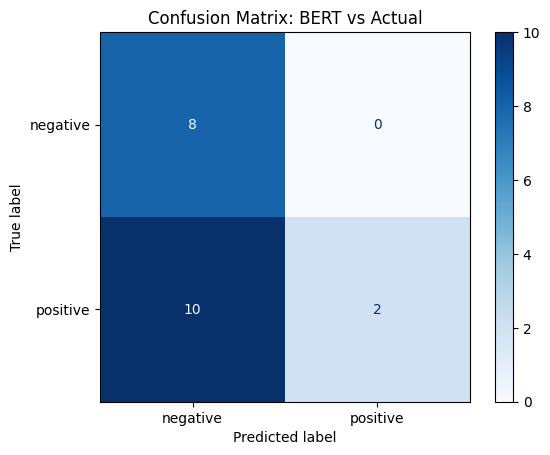

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label_encoder = LabelEncoder()
label_encoder.fit(df['sentiment'])

y_pred = model.predict(X_test, batch_size=batch_size)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

import matplotlib.pyplot as plt
plt.title("Confusion Matrix: BERT vs Actual")
plt.show()